In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 801 ('font.family :sans-serif')
Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 802 ('font.sans-serif :SimHei')
Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 803 ('axes.unicode_minus :False')


In [4]:
df_sales = pd.read_csv('电商历史订单.csv')
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2022 9:09,绿联usb分线器 一拖四,32,10.95,15100,北京
1,536376,22114,6/1/2022 9:32,加大男装T恤男大码胖子宽松卡,48,50.45,15291,上海
2,536376,21733,6/1/2022 9:32,唐装男夏季青年棉麻中国风加肥,64,86.55,15291,上海
3,536378,22386,6/1/2022 9:37,越南进口白心火龙果4个装,10,108.95,14688,北京
4,536378,85099C,6/1/2022 9:37,大连美早樱桃400g 果径约26mm,10,166.95,14688,北京


In [5]:
df_sales.describe()

,数量,单价,用户码
count,87180.000000,87180.000000,87180.000000
mean,10.008167,3.604724,15338.447855
std,48.769817,133.475409,392.000551
min,-9360.000000,0.000000,14681.000000
25%,2.000000,1.250000,15022.000000
50%,4.000000,1.950000,15334.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,38970.000000,16019.000000


In [11]:
df_sales = df_sales.loc[df_sales['数量']>0]

In [12]:
df_sales.describe()

,数量,单价,用户码
count,85355.000000,85355.000000,85355.000000
mean,10.643466,3.018593,15338.099279
std,33.789227,15.604366,392.795910
min,1.000000,0.000000,14681.000000
25%,2.000000,1.250000,15021.000000
50%,4.000000,1.950000,15334.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,3155.950000,16019.000000


In [13]:
df_sales['总价'] = df_sales['单价'] * df_sales['数量']
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,6/1/2022 9:09,绿联usb分线器 一拖四,32,10.95,15100,北京,350.4
1,536376,22114,6/1/2022 9:32,加大男装T恤男大码胖子宽松卡,48,50.45,15291,上海,2421.6
2,536376,21733,6/1/2022 9:32,唐装男夏季青年棉麻中国风加肥,64,86.55,15291,上海,5539.2
3,536378,22386,6/1/2022 9:37,越南进口白心火龙果4个装,10,108.95,14688,北京,1089.5
4,536378,85099C,6/1/2022 9:37,大连美早樱桃400g 果径约26mm,10,166.95,14688,北京,1669.5


<Axes: title={'center': '月度销售额'}, xlabel='年,月'>

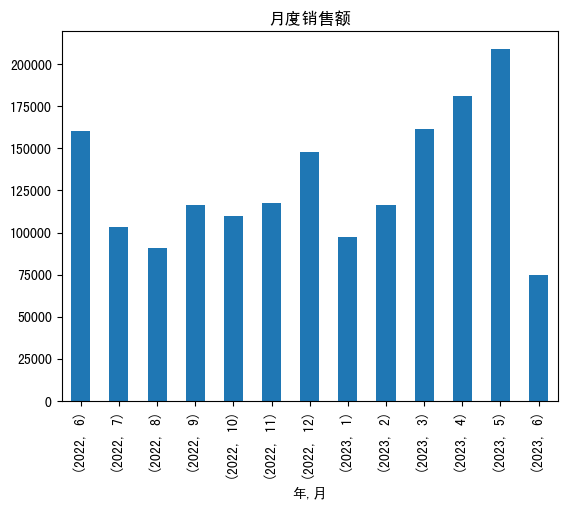

In [14]:
df_sales['年'] = pd.DatetimeIndex(df_sales['消费日期']).year
df_sales['月'] = pd.DatetimeIndex(df_sales['消费日期']).month
df_sales.groupby(['年','月'])['总价'].sum().plot(kind='bar',title='月度销售额')


<Axes: title={'center': '单品销售额'}, xlabel='产品码'>

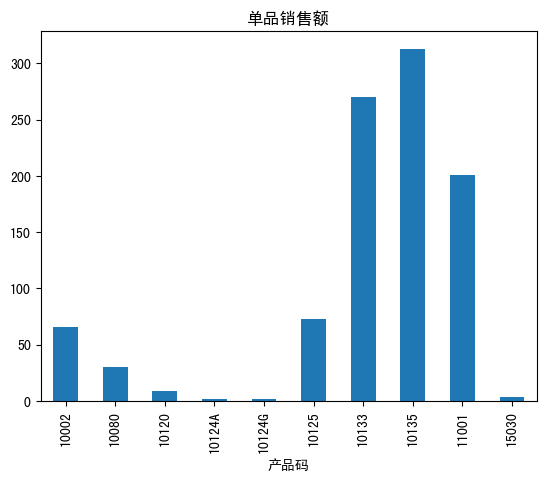

In [18]:
df_sales.groupby(['产品码'])['总价'].sum()[0:10].plot(kind='bar',title='单品销售额')


<Axes: title={'center': '各地售额'}, xlabel='城市'>

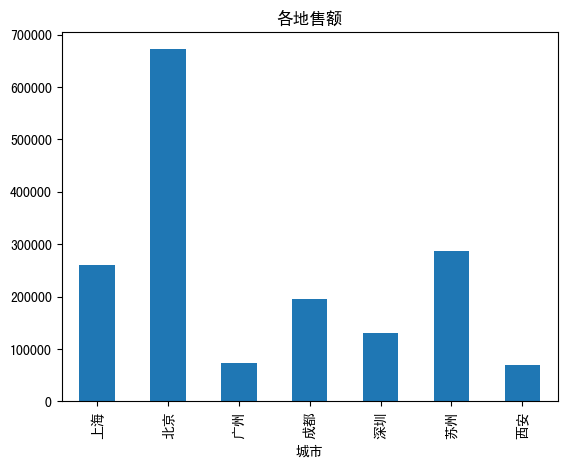

In [16]:
df_sales.groupby(['城市'])['总价'].sum().plot(kind='bar',title='各地售额')

In [34]:
df_user1 = df_sales['用户码'].unique()
df_user1

array([15100, 15291, 14688, 15311, 15862, 15513, 15983, 14849, 14729,
       15012, 15525, 15485, 15350, 15605, 15922, 15165, 14696, 15235,
       15694, 14741, 15752, 15601, 15658, 14901, 15955, 15070, 15111,
       15260, 15923, 15363, 15544, 15738, 15827, 15107, 15732, 15823,
       15061, 15640, 15574, 14829, 14775, 15299, 15646, 14865, 15093,
       16013, 14723, 15373, 15769, 14898, 15545, 15465, 15038, 14800,
       15708, 15351, 14813, 15332, 14810, 15716, 15570, 15880, 15808,
       15023, 15426, 15894, 15867, 15555, 15889, 15953, 15502, 15987,
       14748, 15899, 15898, 15039, 15919, 15860, 15304, 15048, 15301,
       14708, 14825, 15078, 15028, 15882, 15984, 15356, 15194, 15602,
       15649, 14907, 15018, 15838, 14733, 15353, 15002, 15965, 15024,
       15858, 15180, 14739, 15081, 14821, 15628, 14744, 15750, 14796,
       15973, 15021, 15529, 15498, 16016, 15032, 15916, 15221, 15298,
       15005, 15581, 15680, 14866, 15713, 15347, 14766, 15996, 16011,
       15079, 15660,

In [35]:
df_user = pd.DataFrame(df_sales['用户码'].unique())
df_user

,0
0,15100
1,15291
2,14688
3,15311
4,15862
...,...
975,15318
976,16000
977,15195
978,15471


In [36]:
df_user.columns=['用户码']
df_user = df_user.sort_values(by='用户码',ascending = True).reset_index(drop=True)
df_user

,用户码
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


In [37]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index()
df_recent_buy.columns = ['用户码','最近日期']
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days
df_user = pd.merge(df_user,df_recent_buy[['用户码','R值']],on='用户码')
df_user.head()

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


<Axes: title={'center': '新近度分布直方图'}, ylabel='Frequency'>

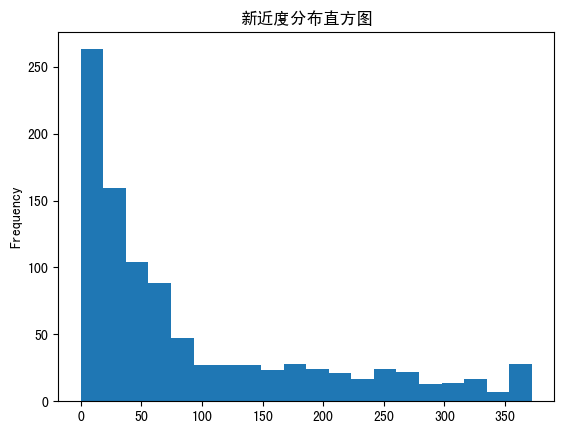

In [38]:
df_user['R值'].plot(kind='hist',bins=20,title='新近度分布直方图')

In [42]:
from sklearn.cluster import KMeans
#假定通过手肘图计算得知 k为3是肘点
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_user[['R值']])
df_user['R值层级'] = kmeans.predict(df_user[['R值']])
df_user.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,用户码,R值,R值层级
0,14681,70,2
1,14682,187,1
2,14684,25,2
3,14687,106,1
4,14688,7,2


In [46]:
df_new = df_user.groupby('R值层级')['R值'].mean().reset_index()
df_new.head()

,R值层级,R值
0,0,298.094203
1,1,157.162921
2,2,32.088855


In [47]:
df_new = df_new.sort_values(by='R值',ascending=False).reset_index(drop=True)
df_new.head()

,R值层级,R值
0,0,298.094203
1,1,157.162921
2,2,32.088855


In [48]:
df_new['index'] = df_new.index
df_new.head()

,R值层级,R值,index
0,0,298.094203,0
1,1,157.162921,1
2,2,32.088855,2


In [ ]:
df_new = pd.merge(df_user,df_new[['R值层级','index']],on='R值层级')
df_new = df_new.drop(['R值层级'],axis=1)
df_new = df_new.rename(cloumns={'index': '值层级'})
df_new.head()

In [ ]:
df_user.groupby('R值层级')['R值'].describe()

#f值

In [57]:
def order_cluster(cluster_name, target_name,df,ascending=False):
    df_new = df.groupby(cluster_name)[target_name].mean().reset_index() #按聚类结果分组，创建df_new对象
    df_new = df_new.sort_values(by=target_name,ascending=ascending).reset_index(drop=True) #排序
    df_new['index'] = df_new.index #创建索引字段
    df_new = pd.merge(df,df_new[[cluster_name,'index']], on=cluster_name) #基于聚类名称把df_new还原为df对象，并添加索引字段
    df_new = df_new.drop([cluster_name],axis=1) #删除聚类名称
    df_new = df_new.rename(columns={"index":cluster_name}) #将索引字段重命名为聚类名称字段
    return df_new #返回排序后的df_new对象

In [59]:
df_f = df_sales.groupby('用户码')['消费日期'].count().reset_index()
df_f.columns = ['用户码','F值']
df_user = pd.merge(df_user,df_f,on='用户码')
df_user.head()

,用户码,R值,R值层级,F值
0,14681,70,2,7
1,14682,187,1,2
2,14684,25,2,421
3,14687,106,1,15
4,14688,7,2,330


(array([535., 191., 103.,  42.,  35.,  15.,  14.,   8.,  11.,   4.,   7.,
          4.,   0.,   1.,   3.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 4.85600e+01, 9.61200e+01, 1.43680e+02, 1.91240e+02,
        2.38800e+02, 2.86360e+02, 3.33920e+02, 3.81480e+02, 4.29040e+02,
        4.76600e+02, 5.24160e+02, 5.71720e+02, 6.19280e+02, 6.66840e+02,
        7.14400e+02, 7.61960e+02, 8.09520e+02, 8.57080e+02, 9.04640e+02,
        9.52200e+02, 9.99760e+02, 1.04732e+03, 1.09488e+03, 1.14244e+03,
        1.19000e+03, 1.23756e+03, 1.28512e+03, 1.33268e+03, 1.38024e+03,
        1.42780e+03, 1.47536e+03, 1.52292e+03, 1.57048e+03, 1.61804e+03,
        1.66560e+03, 1.71316e+03, 1.76072e+03, 1.80828e+03, 1.85584e+03,
        1.90340e+03, 1.95096e+03, 1.99852e+03, 2.04608e+03, 2.09364e+03,
 

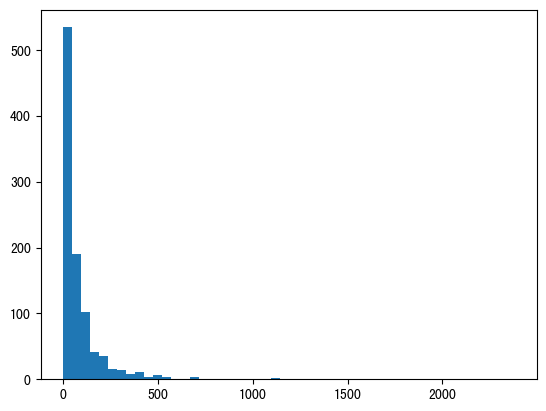

In [60]:
plt.hist(df_user['F值'],bins=50)

(array([234., 166., 101.,  85.,  63.,  52.,  43.,  25.,  33.,  23.,  19.,
         15.,  10.,  11.,  10.,   8.,   8.,   4.,   5.,   5.,   5.,   7.,
          1.,   4.,   4.,   2.,   1.,   4.,   3.,   3.,   1.,   1.,   1.,
          1.,   1.,   4.,   2.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   2.]),
 array([  1.  ,  15.18,  29.36,  43.54,  57.72,  71.9 ,  86.08, 100.26,
        114.44, 128.62, 142.8 , 156.98, 171.16, 185.34, 199.52, 213.7 ,
        227.88, 242.06, 256.24, 270.42, 284.6 , 298.78, 312.96, 327.14,
        341.32, 355.5 , 369.68, 383.86, 398.04, 412.22, 426.4 , 440.58,
        454.76, 468.94, 483.12, 497.3 , 511.48, 525.66, 539.84, 554.02,
        568.2 , 582.38, 596.56, 610.74, 624.92, 639.1 , 653.28, 667.46,
        681.64, 695.82, 710.  ]),
 <BarContainer object of 50 artists>)

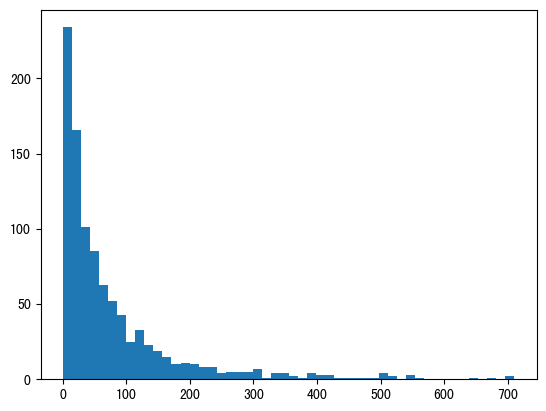

In [66]:
plt.hist(df_user.query('F值<800')['F值'],bins=50)

In [69]:
kmeans_f  = KMeans(n_clusters=4)
kmeans_f.fit(df_user[['F值']])
df_user['F值层级'] = kmeans_f.predict(df_user[['F值']])
df_user = order_cluster('F值层级','F值',df_user,True)
df_user.groupby('F值层级')['F值'].describe()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
F值层级,,,,,,,,
0,718.0,32.401114,24.331637,1.0,12.00,27.0,49.00,92.0
1,202.0,153.178218,49.679950,93.0,114.25,139.5,187.25,278.0
2,53.0,416.641509,111.945573,286.0,329.00,388.0,498.00,710.0
3,7.0,1295.285714,516.333456,899.0,1013.50,1119.0,1321.50,2379.0


In [70]:
df_user=df_user.sort_values(by='用户码',ascending=False).reset_index(drop=True)
df_user.head()

,用户码,R值,R值层级,F值,F值层级
0,16019,46,2,160,1
1,16018,38,2,28,0
2,16017,46,2,32,0
3,16016,2,2,235,1
4,16015,3,2,182,1


#M值 

In [74]:
df_M = df_sales.groupby('用户码')['总价'].sum().reset_index()
df_M.columns=['用户码','M值']
df_user = pd.merge(df_user,df_M,on='用户码')
df_user.head()

,用户码,R值,R值层级,F值,F值层级,M值
0,16019,46,2,160,1,3786.24
1,16018,38,2,28,0,408.90
2,16017,46,2,32,0,211.88
3,16016,2,2,235,1,1508.76
4,16015,3,2,182,1,705.39


(array([667., 166.,  60.,  27.,  16.,   8.,   9.,   1.,   5.,   3.,   3.,
          1.,   1.,   2.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([6.2000000e+00, 1.2214340e+03, 2.4366680e+03, 3.6519020e+03,
        4.8671360e+03, 6.0823700e+03, 7.2976040e+03, 8.5128380e+03,
        9.7280720e+03, 1.0943306e+04, 1.2158540e+04, 1.3373774e+04,
        1.4589008e+04, 1.5804242e+04, 1.7019476e+04, 1.8234710e+04,
        1.9449944e+04, 2.0665178e+04, 2.1880412e+04, 2.3095646e+04,
        2.4310880e+04, 2.5526114e+04, 2.6741348e+04, 2.7956582e+04,
        2.9171816e+04, 3.0387050e+04, 3.1602284e+04, 3.2817518e+04,
        3.4032752e+04, 3.5247986e+04, 3.6463220e+04, 3.7678454e+04,
        3.8893688e+04, 4.0108922e+04, 4.1324156e+04, 4.2539390e+04,
        4.3754624e+04, 4.4969858e+04, 4.618509

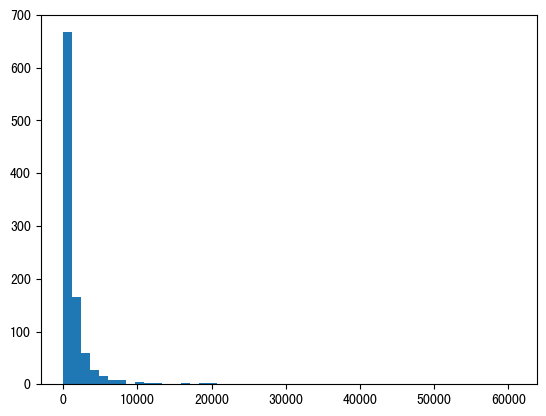

In [75]:
plt.hist(df_user['M值'],bins=50)

In [76]:
kmeans_M = KMeans(n_clusters=4)
kmeans_M.fit(df_user[['M值']])
df_user['M值层级'] = kmeans_M.predict(df_user[['M值']])
df_user = order_cluster('M值层级','M值',df_user,True)
df_user.groupby('M值层级')['M值'].describe()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
M值层级,,,,,,,,
0,832.0,703.523691,575.653200,6.20,262.705,498.845,1043.6375,2420.84
1,121.0,4147.661818,1579.243808,2429.78,2868.800,3610.960,4954.8400,8347.20
2,20.0,13632.917000,3578.349455,9585.91,10627.310,12454.680,16265.9350,20261.10
3,7.0,46682.748571,10514.233536,33643.08,38523.550,44534.300,55393.4300,60767.90


In [77]:
df_user=df_user.sort_values(by='用户码',ascending=False).reset_index(drop=True)
df_user.head()

,用户码,R值,R值层级,F值,F值层级,M值,M值层级
0,16019,46,2,160,1,3786.24,1
1,16018,38,2,28,0,408.90,0
2,16017,46,2,32,0,211.88,0
3,16016,2,2,235,1,1508.76,0
4,16015,3,2,182,1,705.39,0


In [78]:
df_user['总分'] = df_user['R值层级'] + df_user['F值层级'] +df_user['M值层级']
df_user.head()

,用户码,R值,R值层级,F值,F值层级,M值,M值层级,总分
0,16019,46,2,160,1,3786.24,1,4
1,16018,38,2,28,0,408.90,0,2
2,16017,46,2,32,0,211.88,0,2
3,16016,2,2,235,1,1508.76,0,3
4,16015,3,2,182,1,705.39,0,3


In [83]:
df_user.loc[(df_user['总分']<=2) & (df_user['总分']>=0), '总体价值'] = '低价值'
df_user.loc[(df_user['总分']<=4) & (df_user['总分']>=2),'总体价值'] = '中价值'
df_user.loc[(df_user['总分']<=8) & (df_user['总分']>=4),'总体价值'] = '高价值'
df_user


,用户码,R值,R值层级,F值,F值层级,M值,M值层级,总分,总体价值
0,16019,46,2,160,1,3786.24,1,4,高价值
1,16018,38,2,28,0,408.90,0,2,中价值
2,16017,46,2,32,0,211.88,0,2,中价值
3,16016,2,2,235,1,1508.76,0,3,中价值
4,16015,3,2,182,1,705.39,0,3,中价值
...,...,...,...,...,...,...,...,...,...
975,14688,7,2,330,2,18859.37,2,6,高价值
976,14687,106,1,15,0,628.38,0,1,低价值
977,14684,25,2,421,2,1236.28,0,4,高价值
978,14682,187,1,2,0,52.00,0,1,低价值


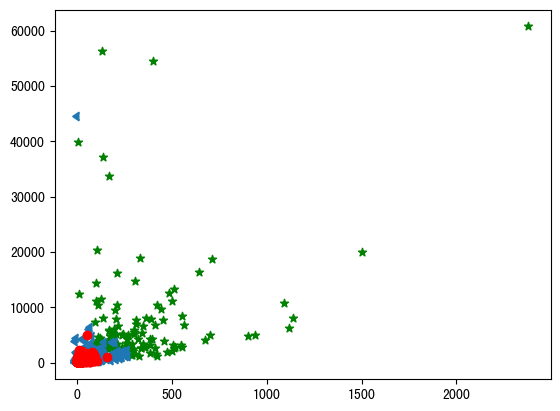

In [85]:
plt.scatter(df_user.query("总体价值=='高价值'")['F值'],df_user.query("总体价值=='高价值'")['M值'],c='g',marker='*')
plt.scatter(df_user.query("总体价值=='中价值'")['F值'],df_user.query("总体价值=='中价值'")['M值'],marker=8)
plt.scatter(df_user.query("总体价值=='低价值'")['F值'],df_user.query("总体价值=='低价值'")['M值'],c='r')

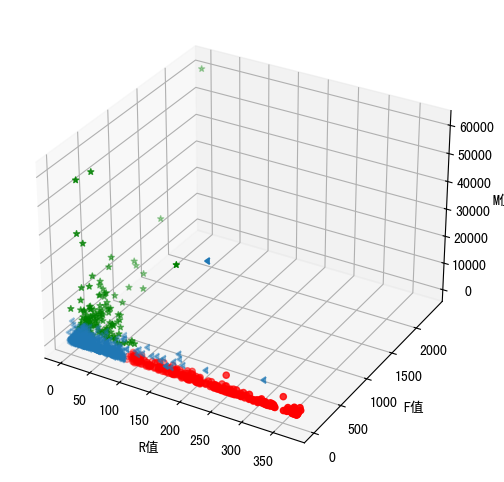

In [89]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111,projection='3d')
ax.scatter(df_user.query("总体价值=='高价值'")['R值'],df_user.query("总体价值=='高价值'")['F值'],df_user.query("总体价值=='高价值'")['M值'],c='g',marker='*')
ax.scatter(df_user.query("总体价值=='中价值'")['R值'],df_user.query("总体价值=='中价值'")['F值'],df_user.query("总体价值=='中价值'")['M值'],marker=8)
ax.scatter(df_user.query("总体价值=='低价值'")['R值'],df_user.query("总体价值=='低价值'")['F值'],df_user.query("总体价值=='低价值'")['M值'],c='r')
ax.set_xlabel('R值')
ax.set_ylabel('F值')
ax.set_zlabel('M值')
plt.show()

In [93]:
df_user.query('总分>6')

,用户码,R值,R值层级,F值,F值层级,M值,M值层级,总分,总体价值
518,15311,0,2,2379,3,60767.90,3,8,高价值
711,15061,3,2,403,2,54534.14,3,7,高价值
730,15039,9,2,1502,3,19914.44,2,7,高价值
914,14769,2,2,1090,3,10674.75,2,7,高价值
